In [110]:
#%pip install scikit-learn
#%pip install numpy
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn

## Import and Check Dataset

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
data = pd.read_csv("House_Rent_Dataset.csv")

data.head(10)

data.info()

data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

### Simple Exploratory Data Analysis

Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: count, Length: 2235, dtype: int64

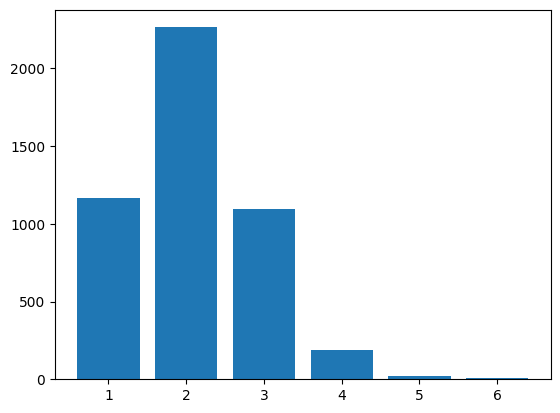

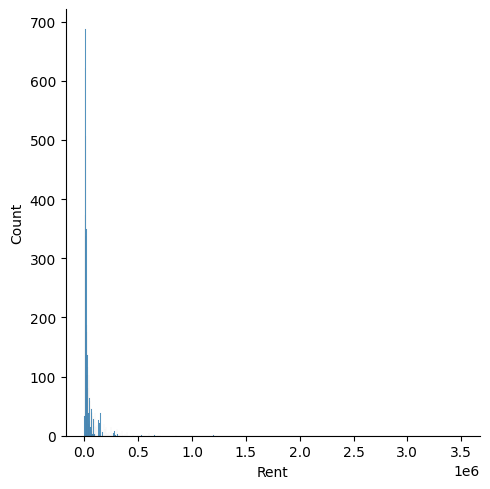

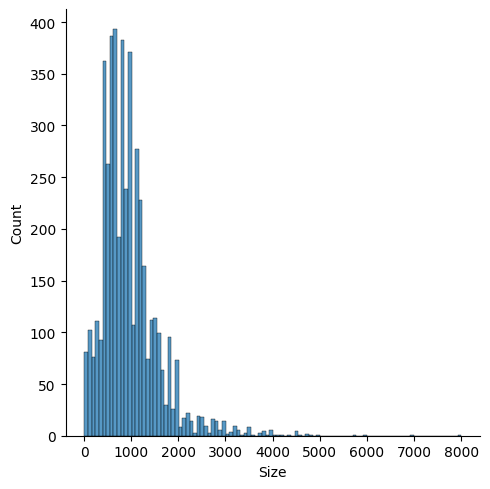

In [113]:
plt.bar(data['BHK'].value_counts().index, data['BHK'].value_counts().values)

sns.displot(data['Rent'])

sns.displot(data['Size'])

data['Floor'].value_counts()

data['Furnishing Status'].value_counts()

data['Area Locality'].value_counts()

# Preprocessing (Encoding)

In [114]:
data = data[['BHK', 'Bathroom', 'Furnishing Status', 'Rent']]

In [115]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [116]:
data = one_hot_encode(data, 'Furnishing Status')
data

,BHK,Bathroom,Rent,Semi-Furnished,Unfurnished
0,2,2,10000,False,True
1,2,1,20000,True,False
2,2,1,17000,True,False
3,2,1,10000,False,True
4,2,1,7500,False,True
...,...,...,...,...,...
4741,2,2,15000,True,False
4742,3,3,29000,True,False
4743,3,3,35000,True,False
4744,3,2,45000,True,False


In [117]:
X = data.drop('Rent', axis = 1)
y = data['Rent']

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 42)


In [119]:
X_train

,BHK,Bathroom,Semi-Furnished,Unfurnished
1995,2,2,True,False
1497,2,2,True,False
2763,1,1,False,False
1351,1,1,True,False
1862,2,2,False,False
...,...,...,...,...
4426,3,3,True,False
466,3,2,False,True
3092,2,2,True,False
3772,3,3,True,False


### Preprocessing (Standardization)

In [120]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [121]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([ 4410.30368561, 30087.93523131, -8355.90712385, -9036.37919781])

## Quantitative Evaluation


In [122]:

y_preds = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score   

print("Coefficients: \n", model.coef_)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))

print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [ 4410.30368561 30087.93523131 -8355.90712385 -9036.37919781]
Mean squared error: 2693550407.36
Coefficient of determination: 0.32


In [123]:
### Qualitative Evaluation
sample_data = X.iloc[0]

sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))
sample_data_standardized

c:\Users\Gelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.10773946,  0.03566558, -0.9501352 ,  1.26702544]])

In [124]:
model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

32239.375356189103